In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
fidcov = np.load('Run_062718/bolp_19p5_0.npz')
fidvd = np.load('Run_062718/bolp_19p5_0_vd.npz')

In [3]:
print fidcov.files
print fidvd.files

['func_all', 'param', 'func_all_cov']
['vpf', 'deltasigma']


In [4]:
cov = fidcov['func_all_cov'][0]+np.cov(fidcov['func_all'].T)
cov[40:60,40:60] += np.cov(fidvd['vpf'].T)
cov[20:40,20:40] += np.cov(fidvd['deltasigma'].T)

In [5]:
cov

array([[  5.63647179e-08,   4.79081283e-04,   5.35225298e-04, ...,
          2.49567056e-08,   2.40955251e-08,   4.57661638e-07],
       [  4.79081283e-04,   2.04252568e+02,   1.53364667e+02, ...,
          7.35982093e-04,   9.72558550e-04,   2.28946795e-02],
       [  5.35225298e-04,   1.53364667e+02,   1.67238349e+02, ...,
          7.79106597e-04,   9.93572088e-04,   2.03039952e-02],
       ..., 
       [  2.49567056e-08,   7.35982093e-04,   7.79106597e-04, ...,
          6.80421805e-08,   4.32356620e-08,   3.19864972e-07],
       [  2.40955251e-08,   9.72558550e-04,   9.93572088e-04, ...,
          4.32356620e-08,   6.52402762e-08,   3.86968435e-07],
       [  4.57661638e-07,   2.28946795e-02,   2.03039952e-02, ...,
          3.19864972e-07,   3.86968435e-07,   1.09874494e-05]])

In [6]:
cov_w = cov[:20,:20]
cov_wd = cov[:40,:40]
cov_wv = np.block([[cov[:20,:20],cov[:20,40:60]],\
              [cov[40:60,:20],cov[40:60,40:60]]])
cov_wc = np.block([[cov[:20,:20],cov[:20,60:]],\
              [cov[60:,:20],cov[60:,60:]]])
cov_wdv = cov[:60,:60]
cov_wdc = np.block([[cov[:40,:40],cov[:40,60:]],\
              [cov[60:,:40],cov[60:,60:]]])
cov_wvc = np.block([[cov[:20,:20],cov[:20,40:]],\
              [cov[40:,:20],cov[40:,40:]]])
cov_wdvc = cov

In [7]:
def eig_analysis(cov):
    order = np.argsort(-np.linalg.eig(cov)[0])
    plt.semilogy()
    plt.grid(axis=u'y')
    plt.plot(np.linalg.eig(cov)[0][order]/np.linalg.eig(cov)[0][order][0],'.')
    plt.xlabel('n')
    plt.ylabel('nth largest eigenvalue')

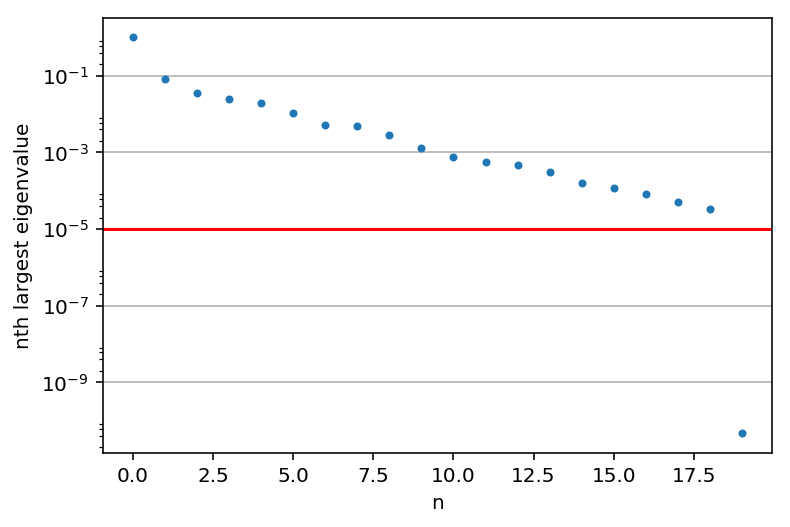

In [8]:
eig_analysis(cov_w)
plt.axhline(1e-5,color='r')
inv_cov_w = np.linalg.pinv(cov_w,rcond=1e-5)

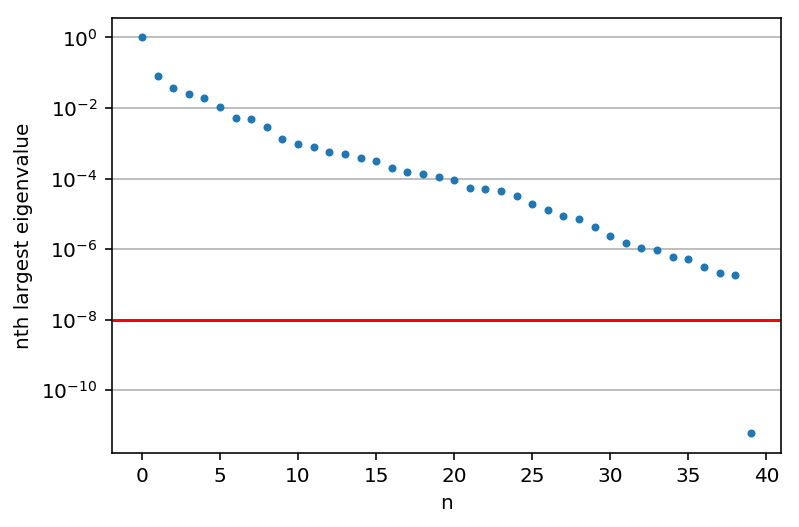

In [9]:
eig_analysis(cov_wd)
plt.axhline(1e-8,color='r')
inv_cov_wd = np.linalg.pinv(cov_wd,rcond=1e-8)

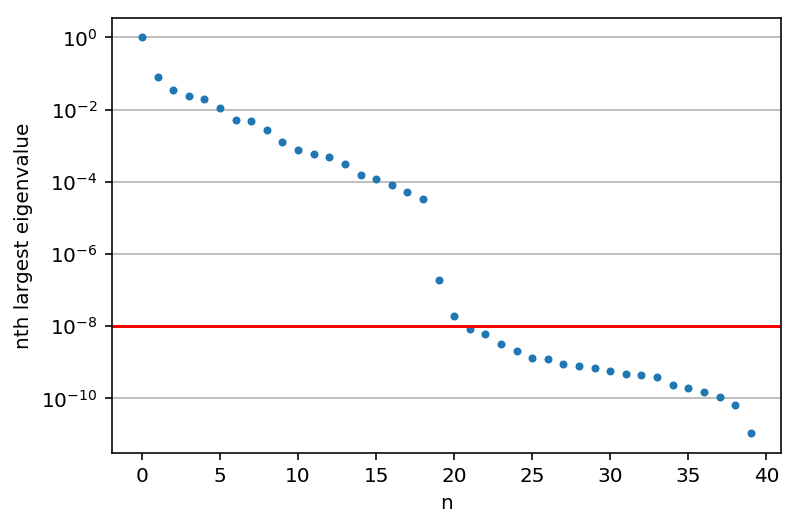

In [10]:
eig_analysis(cov_wv)
plt.axhline(1e-8,color='r')
inv_cov_wv = np.linalg.pinv(cov_wv,rcond=1e-8)

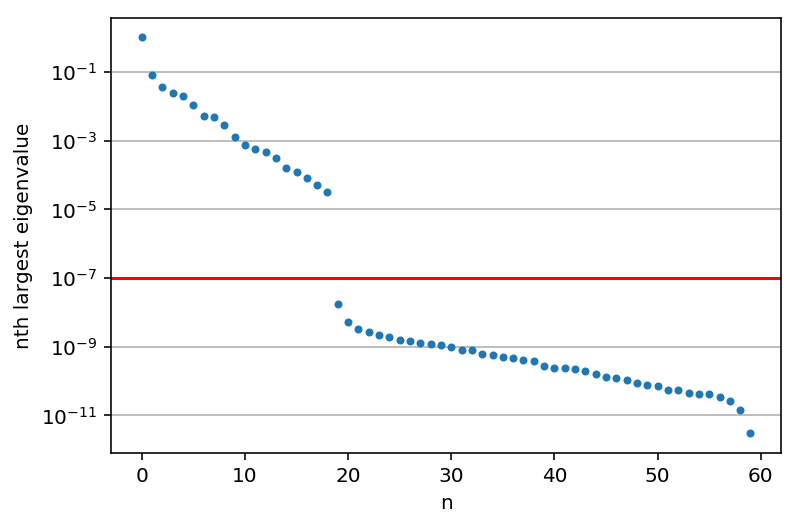

In [11]:
eig_analysis(cov_wc)
plt.axhline(1e-7,color='r')
inv_cov_wc = np.linalg.pinv(cov_wc,rcond=1e-7)

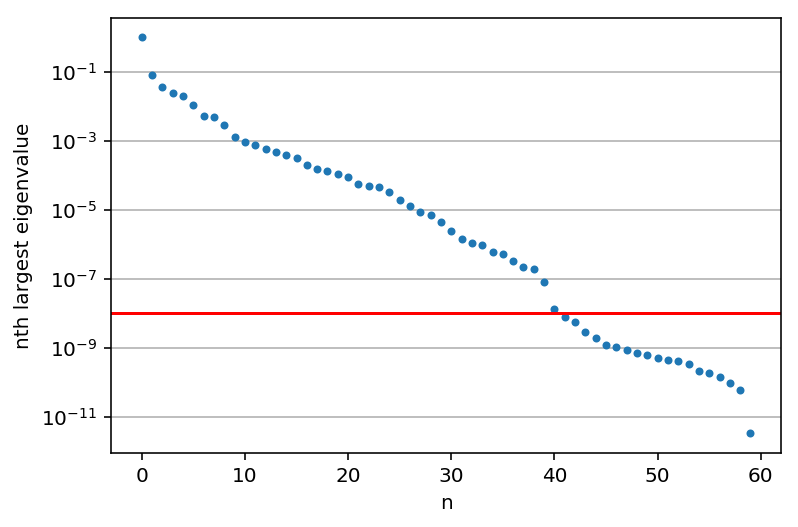

In [12]:
eig_analysis(cov_wdv)
plt.axhline(1e-8,color='r')
inv_cov_wdv = np.linalg.pinv(cov_wdv,rcond=1e-8)

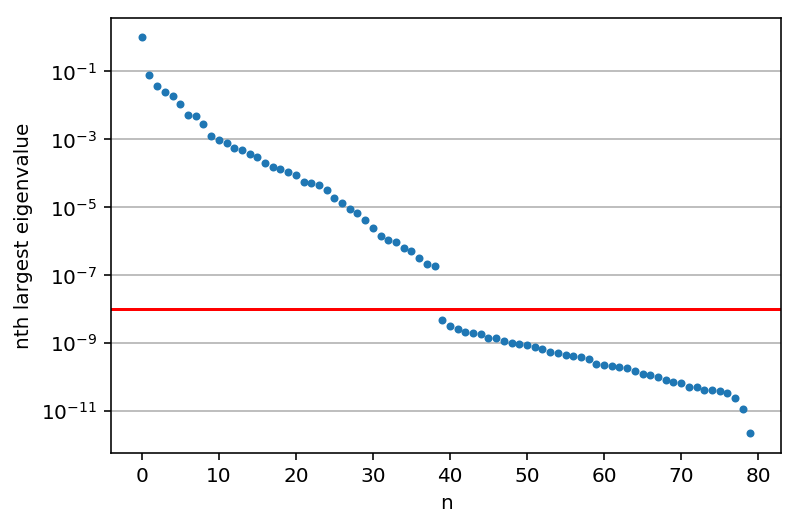

In [13]:
eig_analysis(cov_wdc)
plt.axhline(1e-8,color='r')
inv_cov_wdc = np.linalg.pinv(cov_wdc,rcond=1e-8)

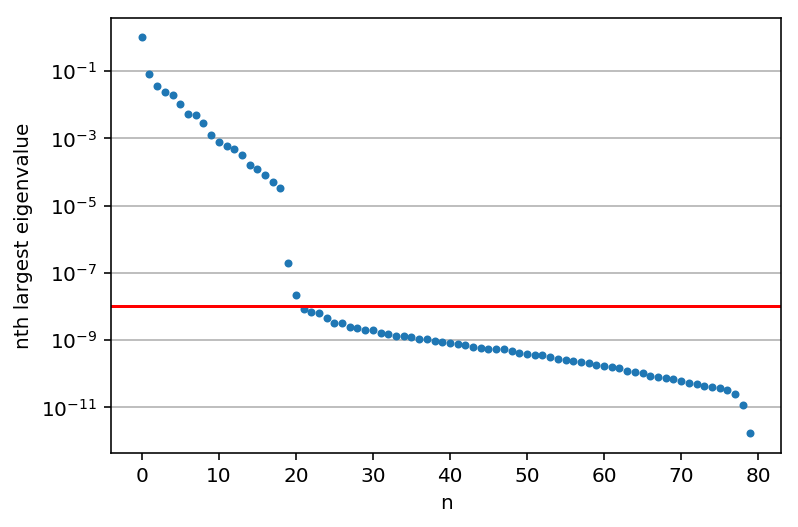

In [14]:
eig_analysis(cov_wvc)
plt.axhline(1e-8,color='r')
inv_cov_wvc = np.linalg.pinv(cov_wvc,rcond=1e-8)

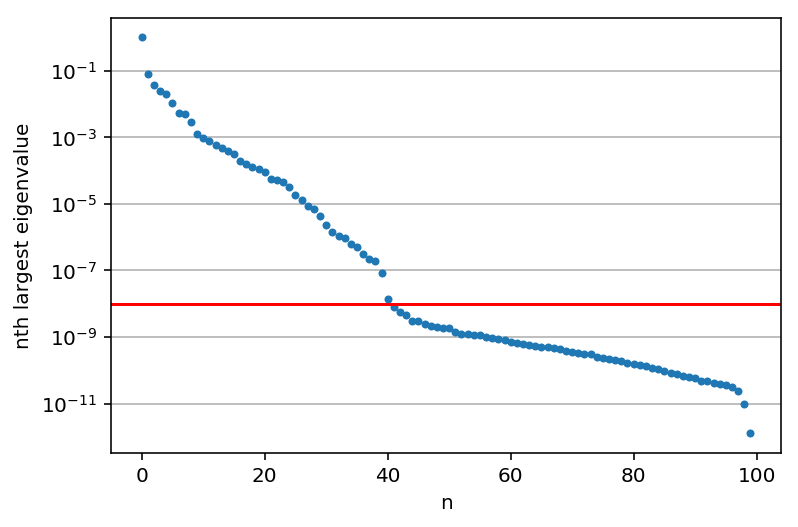

In [15]:
eig_analysis(cov_wdvc)
plt.axhline(1e-8,color='r')
inv_cov_wdvc = np.linalg.pinv(cov_wdvc,rcond=1e-8)

In [16]:
dfdp = np.load('Run_062718/dfdp_bolp_19p5_um0_tcub_alpha07.npz')

In [17]:
dfdp.files

['dfdp_448', 'dfdp_712', 'dfdp_831', 'dfdp_161', 'dfdp_866']

In [18]:
def chop_dfdp(dfdp,comp):
    if comp=='w':
        return dfdp[:,:20]
    elif comp=='wd':
        return dfdp[:,:40]
    elif comp=='wv':
        return np.block([dfdp[:,:20],dfdp[:,40:60]])
    elif comp=='wc':
        return np.block([dfdp[:,:20],dfdp[:,60:]])
    elif comp=='wdv':
        return dfdp[:,:60]
    elif comp=='wdc':
        return np.block([dfdp[:,:40],dfdp[:,60:]])
    elif comp=='wvc':
        return np.block([dfdp[:,:20],dfdp[:,40:]])
    elif comp=='wdvc':
        return dfdp

In [19]:
def calc_fisher(dfdp, invcov):
    fmatrix = np.dot(dfdp,np.dot(invcov,dfdp.T))
    return fmatrix

In [20]:
def calc_1sigma(fisher):
    return np.sqrt(np.linalg.inv(fisher).diagonal())

In [21]:
def all_fisher(name):
    fisher_list = []
    fisher_list.append(calc_fisher(chop_dfdp(dfdp[name],'w'),inv_cov_w))
    fisher_list.append(calc_fisher(chop_dfdp(dfdp[name],'wd'),inv_cov_wd))
    fisher_list.append(calc_fisher(chop_dfdp(dfdp[name],'wv'),inv_cov_wv))
    fisher_list.append(calc_fisher(chop_dfdp(dfdp[name],'wc'),inv_cov_wc))
    fisher_list.append(calc_fisher(chop_dfdp(dfdp[name],'wdv'),inv_cov_wdv))
    fisher_list.append(calc_fisher(chop_dfdp(dfdp[name],'wdc'),inv_cov_wdc))
    fisher_list.append(calc_fisher(chop_dfdp(dfdp[name],'wvc'),inv_cov_wvc))
    fisher_list.append(calc_fisher(chop_dfdp(dfdp[name],'wdvc'),inv_cov_wdvc))
    return fisher_list

In [22]:
def all_1sigma(fisher_list):
    sigma_list = []
    for fisher in fisher_list:
        sigma_list.append(calc_1sigma(fisher))
    return np.array(sigma_list)

In [23]:
comb_list = [r'$w_p$',r'$w_p+\Delta\Sigma$',r'$w_p+vpf$',r'$w_p+P(N_{cic})$',\
             r'$w_p+\Delta\Sigma+vpf$',r'$w_p+\Delta\Sigma+P(N_{cic})$',r'$w_p+vpf+P(N_{cic})$',\
             r'$w_p+\Delta\Sigma+vpf+P(N_{cic})$']

In [24]:
param_list = [r'$\alpha$', r'$logM_1$', r'$\sigma_{logM}$', r'$logM_0$', r'$logM_{min}$', r'$A_{cen}$', r'$A_{sat}$']

In [25]:
all_1sigma_161 = all_1sigma(all_fisher('dfdp_161'))
all_1sigma_448 = all_1sigma(all_fisher('dfdp_448'))
all_1sigma_712 = all_1sigma(all_fisher('dfdp_712'))
all_1sigma_831 = all_1sigma(all_fisher('dfdp_831'))
all_1sigma_866 = all_1sigma(all_fisher('dfdp_866'))

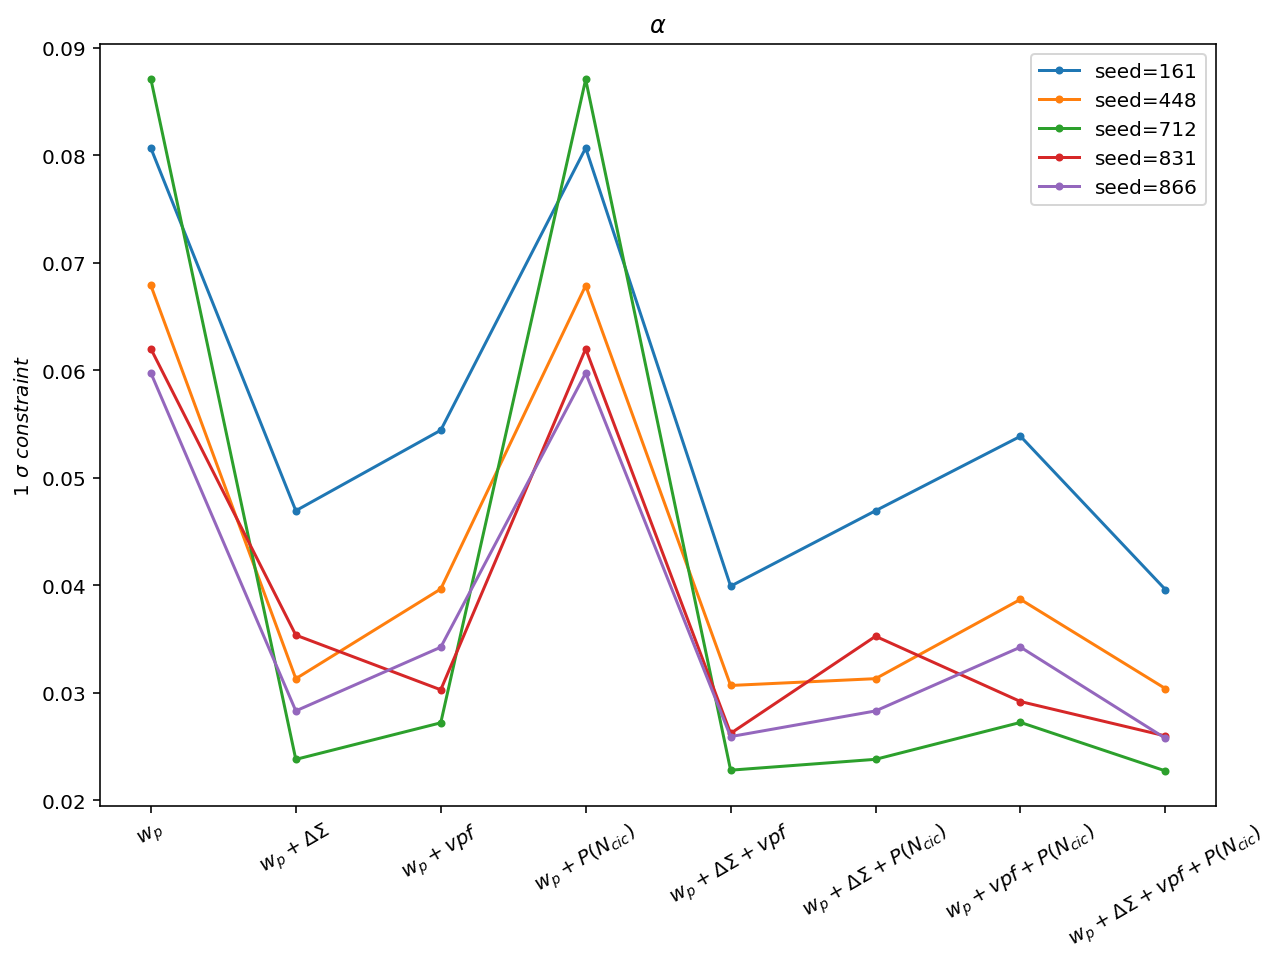

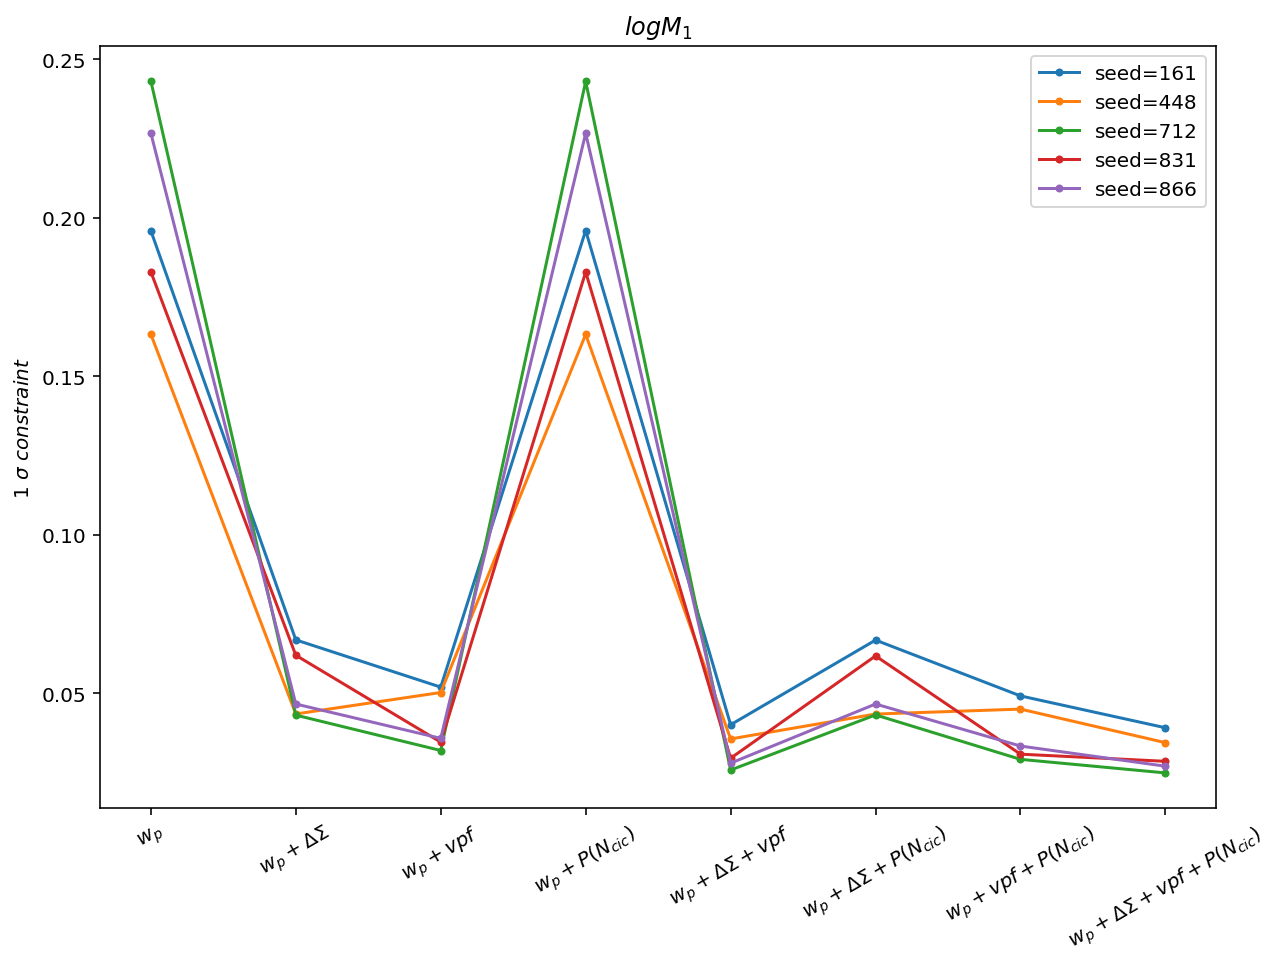

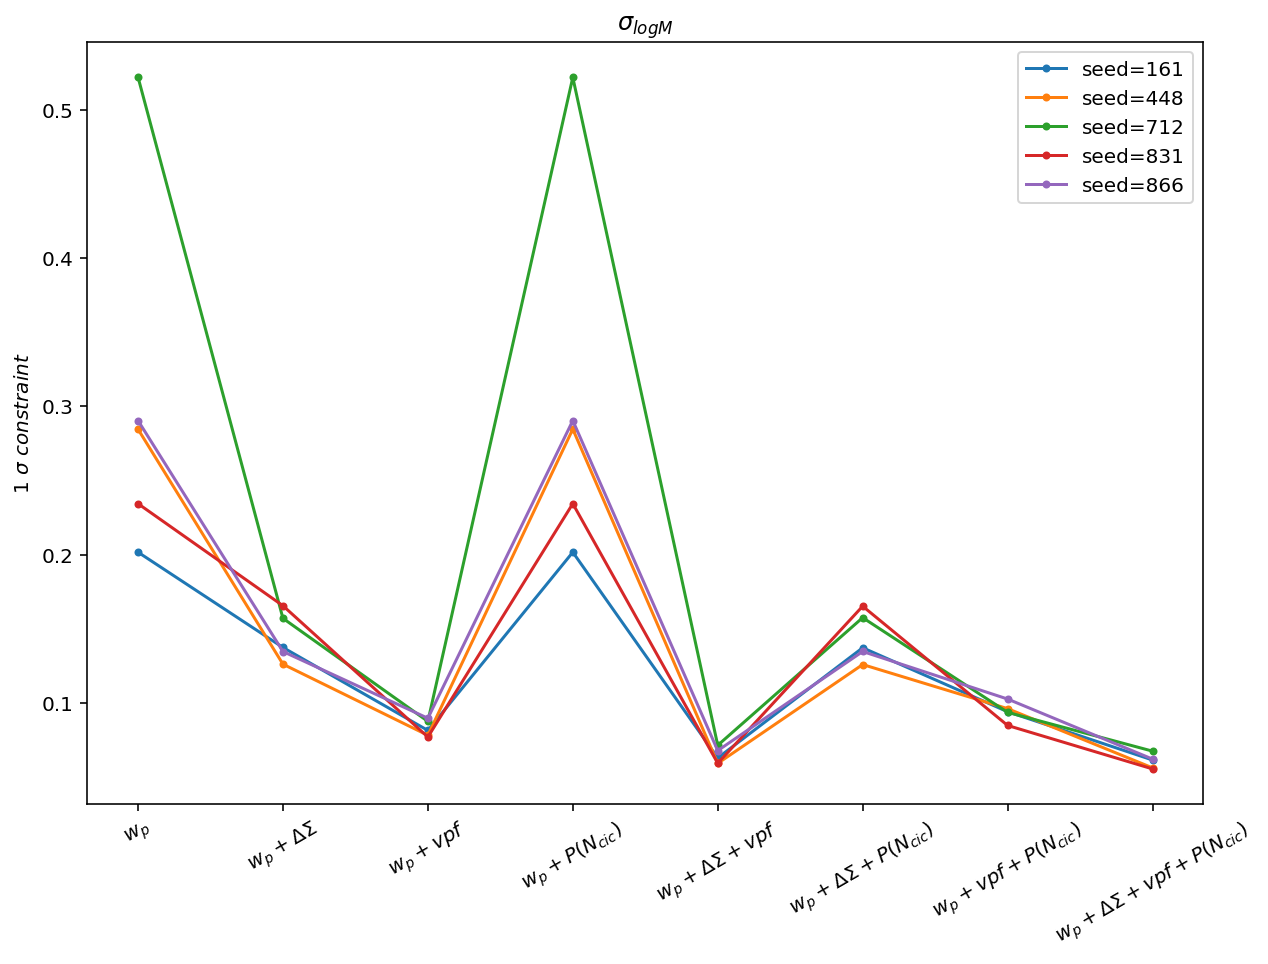

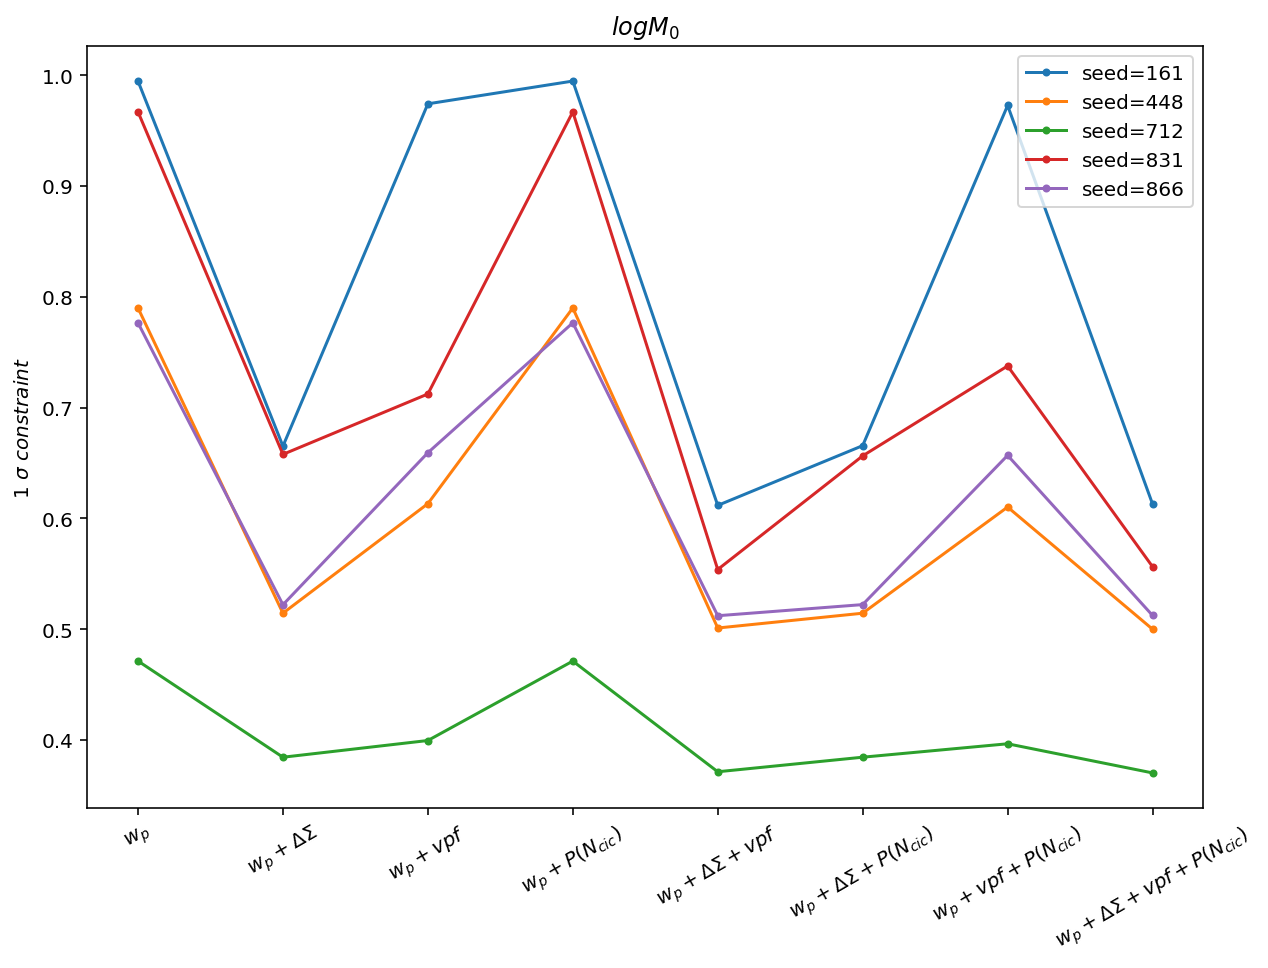

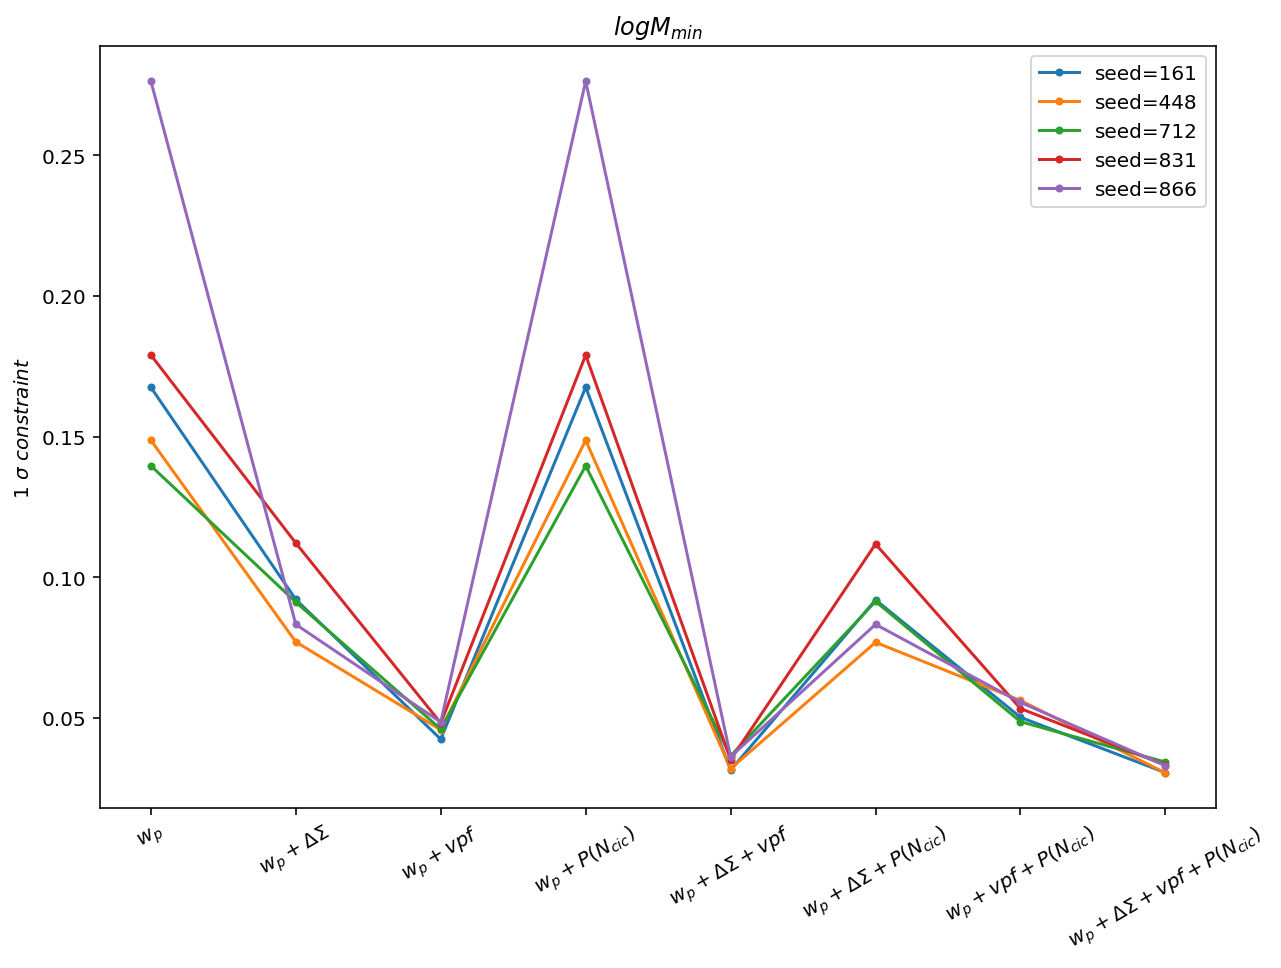

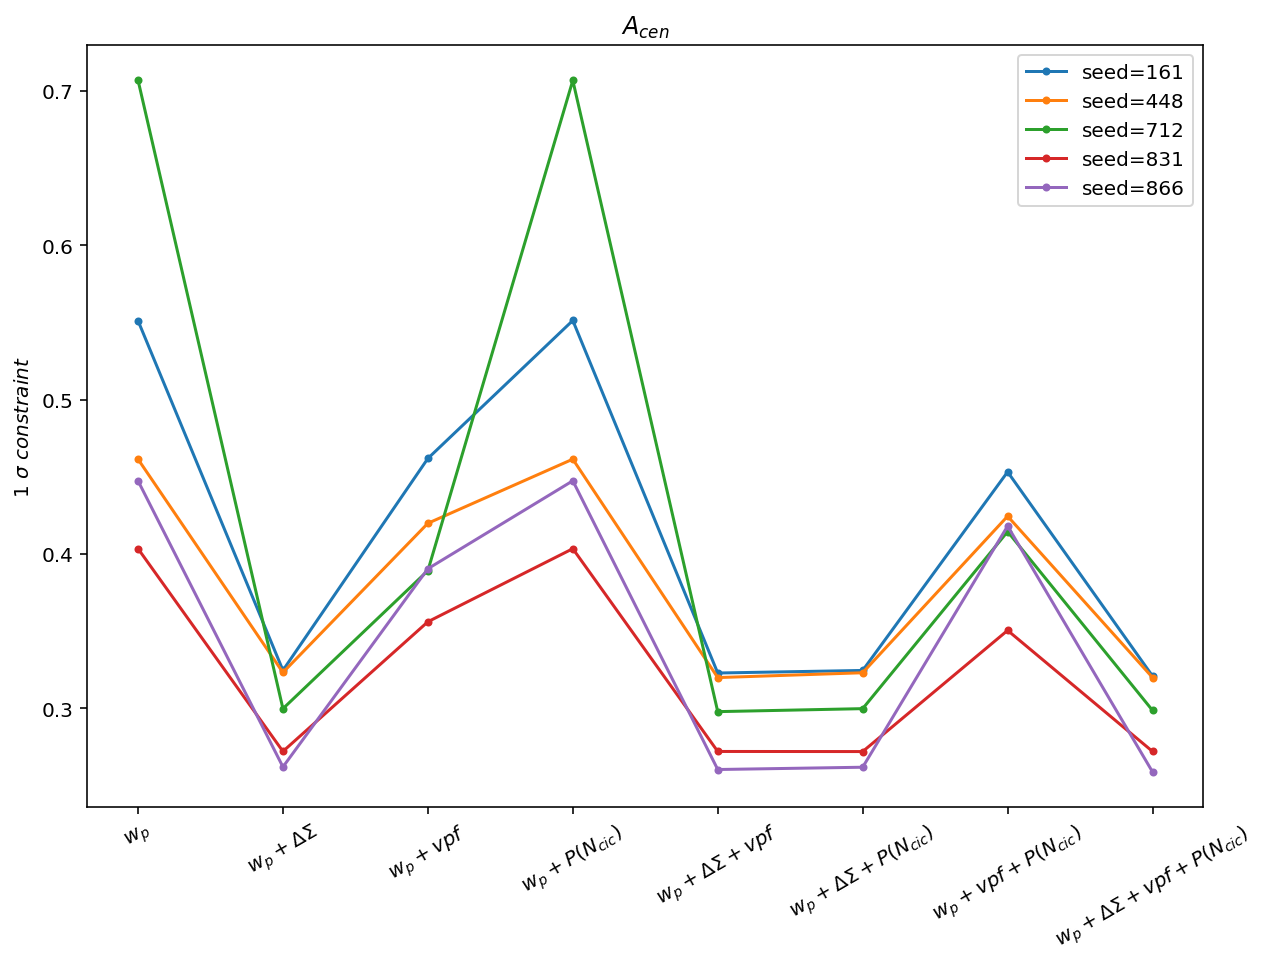

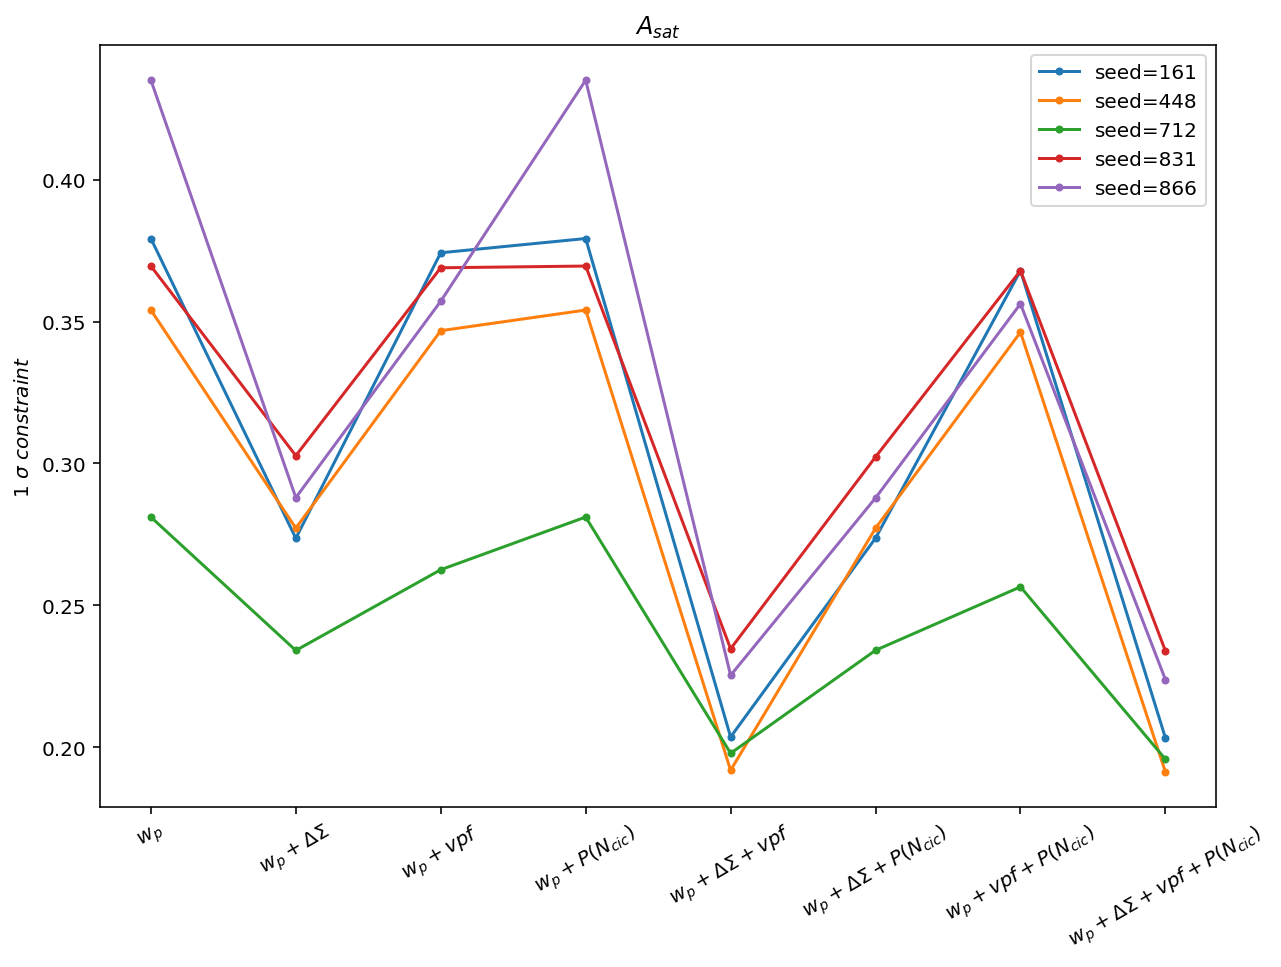

In [27]:
for i in range(7):
    plt.figure(figsize=(10,7))
    plt.title(param_list[i])
    plt.xticks(range(1,9),comb_list,rotation=30)
    plt.plot(range(1,9),all_1sigma_161[:,i],'.-',label='seed=161')
    plt.plot(range(1,9),all_1sigma_448[:,i],'.-',label='seed=448')
    plt.plot(range(1,9),all_1sigma_712[:,i],'.-',label='seed=712')
    plt.plot(range(1,9),all_1sigma_831[:,i],'.-',label='seed=831')
    plt.plot(range(1,9),all_1sigma_866[:,i],'.-',label='seed=866')
    plt.ylabel(r'$1\ \sigma\ constraint$')
    plt.legend()